# Modeling2. 공선성을 고려하여 상관게수가 적당히 높다 싶은 feature 모두 제거

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# 데이터 불러오기
data_origin = pd.read_csv("https://raw.githubusercontent.com/agtechresearch/LectureAlgorithm/main/csv/married_full.csv")
data_origin

,gender,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_sincere,pref_of_partner_intelligence,pref_of_partner_funny,pref_of_partner_ambitious,pref_of_partner_shared_interests,...,my_eval_sincere,my_eval_intelligence,my_eval_funny,my_eval_ambition,my_eval_shared_interests,interests_correlate,expected_happy_with_couple_match,how_much_i_liked,guess_prob_liked,married
0,female,21.0,27.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,...,9.0,7.0,7.0,6.0,5.0,0.14,3.0,7.0,6.0,0
1,female,21.0,22.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,...,8.0,7.0,8.0,5.0,6.0,0.54,3.0,7.0,5.0,0
2,female,21.0,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,...,8.0,9.0,8.0,5.0,7.0,0.16,3.0,7.0,5.0,1
3,female,21.0,23.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,...,6.0,8.0,7.0,6.0,8.0,0.61,3.0,7.0,6.0,1
4,female,21.0,24.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,...,6.0,7.0,7.0,6.0,6.0,0.21,3.0,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,male,25.0,26.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,...,5.0,5.0,5.0,NaN,NaN,0.64,10.0,2.0,5.0,0
8358,male,25.0,24.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,...,6.0,8.0,4.0,4.0,NaN,0.71,10.0,4.0,4.0,0
8359,male,25.0,29.0,1.0,40.0,10.0,30.0,10.0,10.0,NaN,...,7.0,8.0,8.0,8.0,NaN,-0.46,10.0,6.0,5.0,0
8360,male,25.0,22.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,...,6.0,5.0,4.0,NaN,5.0,0.62,10.0,5.0,5.0,0


In [30]:
# 전처리를 위한 원본 데이터 복사
data = data_origin.copy()

In [31]:
# 메모리를 효율적으로 사용하기 위한 downcast 함수 정의
def downcast(df, verbose=True):     # verbose 옵션 추가: (True)인 경우 몇 퍼센트 압축됐는지 출력
    start_mem = df.memory_usage().sum() / 1024**2   # 초기 메모리 사용량
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print(f'{(100*(start_mem - end_mem) / start_mem):.1f}% 압축됨')

    return df

In [32]:
downcast(data)

49.6% 압축됨


,gender,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_sincere,pref_of_partner_intelligence,pref_of_partner_funny,pref_of_partner_ambitious,pref_of_partner_shared_interests,...,my_eval_sincere,my_eval_intelligence,my_eval_funny,my_eval_ambition,my_eval_shared_interests,interests_correlate,expected_happy_with_couple_match,how_much_i_liked,guess_prob_liked,married
0,female,21.0,27.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,...,9.0,7.0,7.0,6.0,5.0,0.14,3.0,7.0,6.0,0
1,female,21.0,22.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,...,8.0,7.0,8.0,5.0,6.0,0.54,3.0,7.0,5.0,0
2,female,21.0,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,...,8.0,9.0,8.0,5.0,7.0,0.16,3.0,7.0,5.0,1
3,female,21.0,23.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,...,6.0,8.0,7.0,6.0,8.0,0.61,3.0,7.0,6.0,1
4,female,21.0,24.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,...,6.0,7.0,7.0,6.0,6.0,0.21,3.0,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,male,25.0,26.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,...,5.0,5.0,5.0,NaN,NaN,0.64,10.0,2.0,5.0,0
8358,male,25.0,24.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,...,6.0,8.0,4.0,4.0,NaN,0.71,10.0,4.0,4.0,0
8359,male,25.0,29.0,1.0,40.0,10.0,30.0,10.0,10.0,NaN,...,7.0,8.0,8.0,8.0,NaN,-0.46,10.0,6.0,5.0,0
8360,male,25.0,22.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,...,6.0,5.0,4.0,NaN,5.0,0.62,10.0,5.0,5.0,0


In [33]:
select_columns = ['gender', 'age', 'age_partner', 'importance_same_religion', 'pref_of_partner_attractive',
                  'pref_of_partner_funny', 'eval_by_partner_attractive', 'my_pref_attractive', 'my_pref_funny',
                  'how_much_i_liked', 'married']

In [34]:
data = data[select_columns]

In [35]:
data

,gender,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_funny,eval_by_partner_attractive,my_pref_attractive,my_pref_funny,how_much_i_liked,married
0,female,21.0,27.0,4.0,35.0,20.0,6.0,15.0,15.0,7.0,0
1,female,21.0,22.0,4.0,60.0,40.0,7.0,15.0,15.0,7.0,0
2,female,21.0,22.0,4.0,19.0,18.0,10.0,15.0,15.0,7.0,1
3,female,21.0,23.0,4.0,30.0,40.0,7.0,15.0,15.0,7.0,1
4,female,21.0,24.0,4.0,30.0,10.0,8.0,15.0,15.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8357,male,25.0,26.0,1.0,10.0,20.0,10.0,70.0,15.0,2.0,0
8358,male,25.0,24.0,1.0,50.0,5.0,6.0,70.0,15.0,4.0,0
8359,male,25.0,29.0,1.0,40.0,10.0,2.0,70.0,15.0,6.0,0
8360,male,25.0,22.0,1.0,10.0,10.0,5.0,70.0,15.0,5.0,0


> Train/Test data split

In [36]:
# 단순 랜덤 샘플링
#from sklearn.model_selection import train_test_split

#train_set, test_set = train_test_split(data, test_size = 0.2, random_state=42)


# 계층적 샘플링
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['married']):
    sss_train_set = data.loc[train_index]
    sss_test_set = data.loc[test_index]

In [37]:
X_train = sss_train_set.drop("married", axis=1)
y_train = sss_train_set["married"].copy()

X_test = sss_test_set.drop("married", axis=1)
y_test = sss_test_set["married"].copy()

# Preprocessing

In [38]:
X_train

,gender,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_funny,eval_by_partner_attractive,my_pref_attractive,my_pref_funny,how_much_i_liked
3484,male,28.0,24.0,9.0,15.000000,20.00,7.0,20.00,10.00,4.0
4669,male,25.0,33.0,8.0,20.000000,10.00,7.0,24.00,20.00,6.0
1616,male,28.0,23.0,6.0,15.000000,15.00,4.0,20.00,15.00,6.0
147,male,24.0,25.0,1.0,9.090000,18.18,6.0,30.00,10.00,9.0
6819,female,26.0,27.0,1.0,40.000000,10.00,7.0,30.00,30.00,1.0
...,...,...,...,...,...,...,...,...,...,...
7560,female,27.0,24.0,3.0,20.000000,17.00,9.0,58.00,10.00,6.0
2714,female,25.0,27.0,1.0,7.500000,22.50,8.0,13.21,16.98,6.0
2055,female,27.0,22.0,3.0,18.370001,20.41,5.0,14.00,14.00,7.0
3512,male,25.0,34.0,1.0,10.000000,20.00,6.0,20.00,15.00,6.0


In [39]:
# gender OHE
X_train = pd.get_dummies(X_train, columns=['gender'], drop_first=True)

In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=42)
X_train_imputed = imputer.fit_transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

In [41]:
X_train_imputed

,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_funny,eval_by_partner_attractive,my_pref_attractive,my_pref_funny,how_much_i_liked,gender_male
0,28.0,24.0,9.0,15.000000,20.00,7.0,20.00,10.00,4.0,1.0
1,25.0,33.0,8.0,20.000000,10.00,7.0,24.00,20.00,6.0,1.0
2,28.0,23.0,6.0,15.000000,15.00,4.0,20.00,15.00,6.0,1.0
3,24.0,25.0,1.0,9.090000,18.18,6.0,30.00,10.00,9.0,1.0
4,26.0,27.0,1.0,40.000000,10.00,7.0,30.00,30.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6684,27.0,24.0,3.0,20.000000,17.00,9.0,58.00,10.00,6.0,0.0
6685,25.0,27.0,1.0,7.500000,22.50,8.0,13.21,16.98,6.0,0.0
6686,27.0,22.0,3.0,18.370001,20.41,5.0,14.00,14.00,7.0,0.0
6687,25.0,34.0,1.0,10.000000,20.00,6.0,20.00,15.00,6.0,1.0


In [42]:
X_train_imputed.isnull().sum().sum()

0

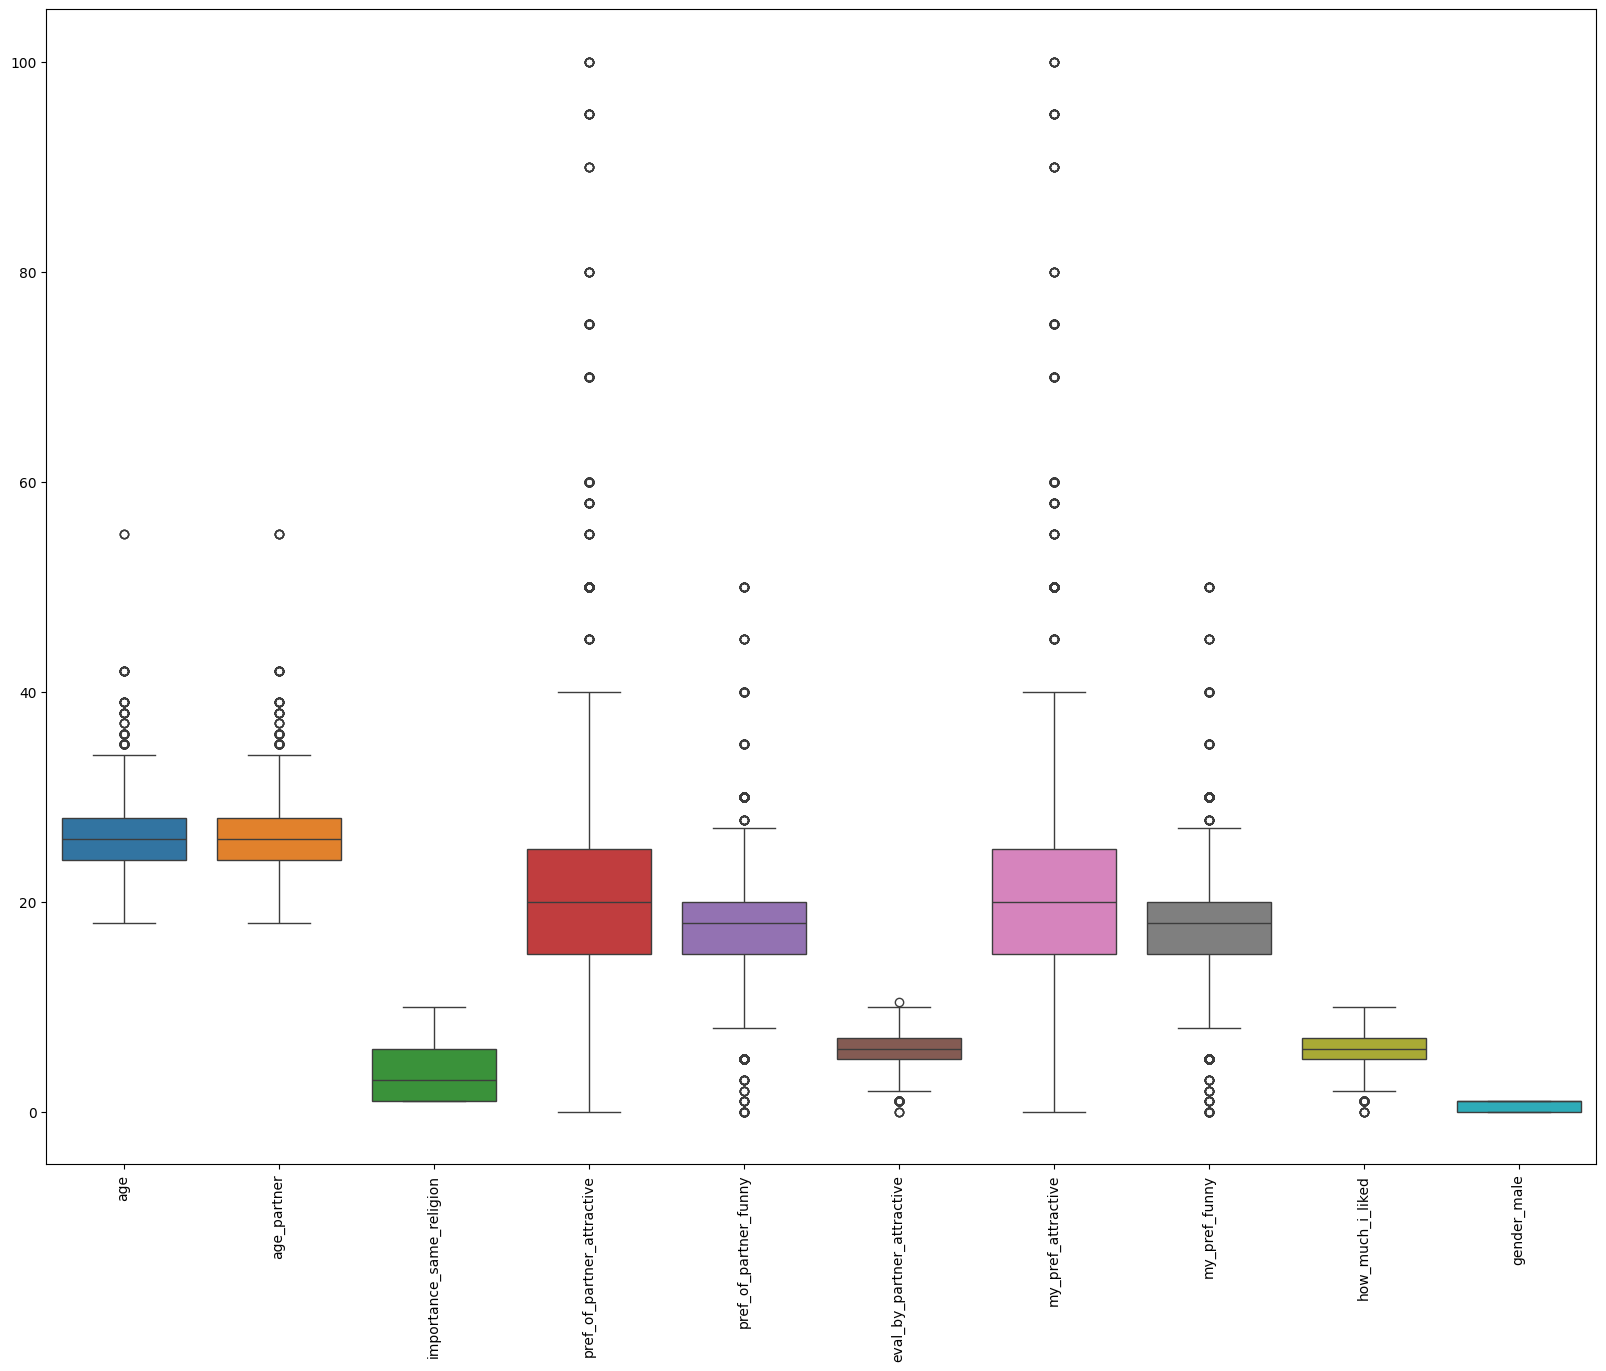

In [18]:
# 모든 feature들의 boxplot 그리기
plt.figure(figsize=(20, 15))
sns.boxplot(data=X_train_imputed)
plt.xticks(rotation=90)
plt.show()

In [15]:
num_attribs = X_train.columns[:-1]     # 수치형 column 지정
cat_attribs = ['gender_male']    # 범주형 column 지정

In [17]:
X_train_imputed[num_attribs]

,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_sincere,pref_of_partner_intelligence,pref_of_partner_funny,pref_of_partner_ambitious,pref_of_partner_shared_interests,eval_by_partner_attractive,...,my_eval_attractive,my_eval_sincere,my_eval_intelligence,my_eval_funny,my_eval_ambition,my_eval_shared_interests,interests_correlate,expected_happy_with_couple_match,how_much_i_liked,guess_prob_liked
0,28.0,24.0,9.0,15.000000,20.000000,15.00,20.00,15.00,15.00,7.0,...,4.0,6.0,7.0,2.0,2.00000,1.000000,0.07,5.0,4.0,2.0
1,25.0,33.0,8.0,20.000000,25.000000,25.00,10.00,15.00,5.00,7.0,...,6.0,8.0,7.0,5.0,5.00000,5.000000,0.17,6.0,6.0,4.0
2,28.0,23.0,6.0,15.000000,15.000000,20.00,15.00,20.00,15.00,4.0,...,6.0,8.0,8.0,7.0,6.00000,6.000000,0.52,6.0,6.0,5.0
3,24.0,25.0,1.0,9.090000,18.180000,27.27,18.18,18.18,9.09,6.0,...,9.0,9.0,8.0,9.0,5.00000,7.000000,-0.23,5.0,9.0,7.0
4,26.0,27.0,1.0,40.000000,20.000000,20.00,10.00,10.00,0.00,7.0,...,1.0,5.0,5.0,1.0,5.00000,1.000000,-0.34,5.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,27.0,24.0,3.0,20.000000,16.000000,16.00,17.00,16.00,15.00,9.0,...,5.0,8.0,7.0,7.0,7.00000,6.000000,-0.05,2.0,6.0,6.0
6685,25.0,27.0,1.0,7.500000,17.500000,20.00,22.50,12.50,20.00,8.0,...,3.0,7.0,7.0,6.0,6.50994,5.314748,0.15,5.0,6.0,6.0
6686,27.0,22.0,3.0,18.370001,18.370001,20.41,20.41,16.33,6.12,5.0,...,5.0,8.0,8.0,6.0,7.00000,7.000000,-0.15,5.0,7.0,7.0
6687,25.0,34.0,1.0,10.000000,20.000000,20.00,20.00,20.00,10.00,6.0,...,5.0,6.0,8.0,5.0,6.00000,3.000000,0.27,6.0,6.0,6.0


In [19]:
# boxplot 기준의 이상치 수정
Q1 = X_train_imputed[num_attribs].quantile(0.25)
Q3 = X_train_imputed[num_attribs].quantile(0.75)
IQR = Q3 - Q1

# 낮은 이상치는 최소값, 높은 이상치는 최대값으로 대체
for i in num_attribs:
    X_train_imputed.loc[X_train_imputed[i] < Q1[i] - 1.5 * IQR[i], i] = Q1[i] - 1.5 * IQR[i]
    X_train_imputed.loc[X_train_imputed[i] > Q3[i] + 1.5 * IQR[i], i] = Q3[i] + 1.5 * IQR[i]

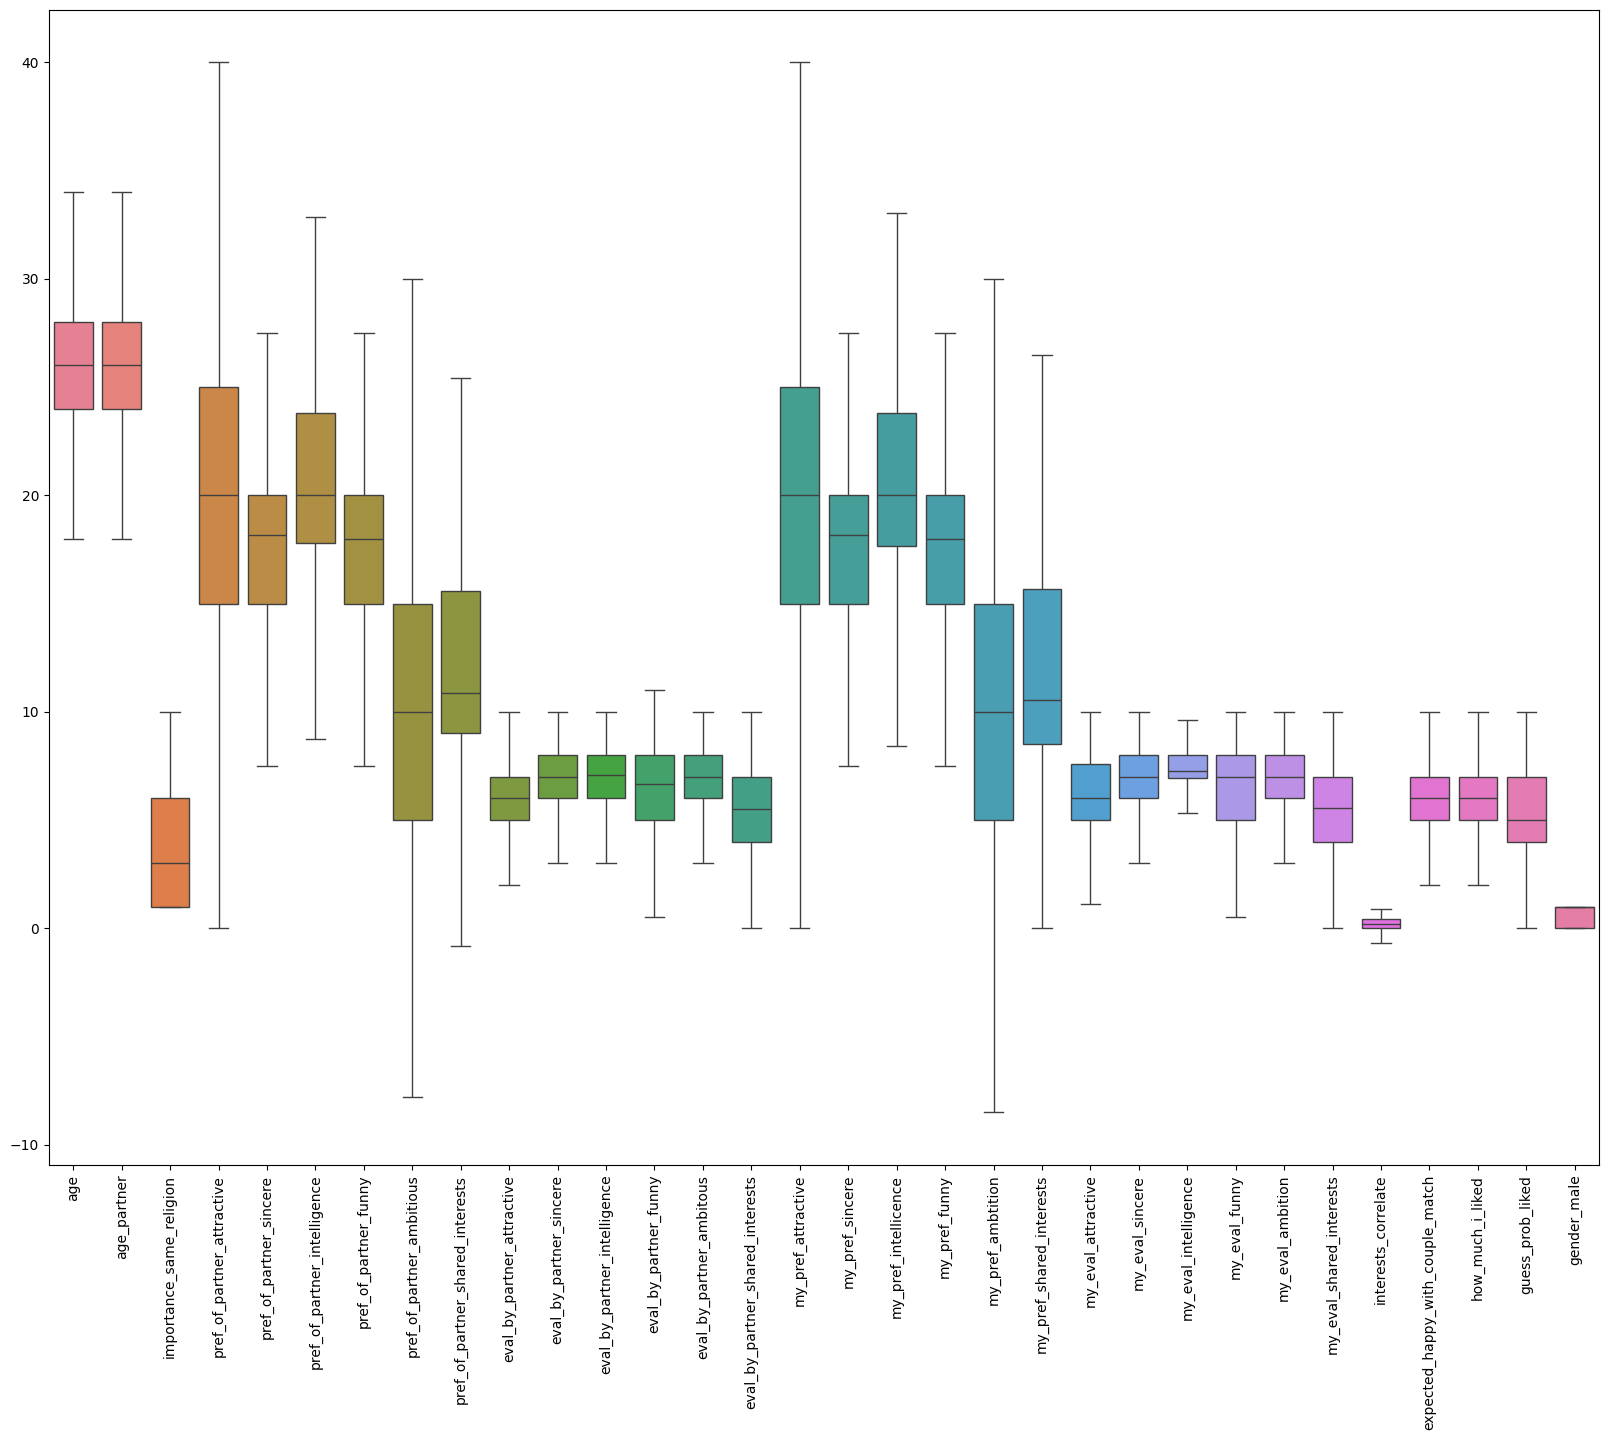

In [21]:
# 모든 feature들의 boxplot 그리기
plt.figure(figsize=(20, 15))
sns.boxplot(data=X_train_imputed)
plt.xticks(rotation=90)
plt.show()

In [43]:
num_attribs = X_train_imputed.columns[:-1]
X_train_imputed[num_attribs]

,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_funny,eval_by_partner_attractive,my_pref_attractive,my_pref_funny,how_much_i_liked
0,28.0,24.0,9.0,15.000000,20.00,7.0,20.00,10.00,4.0
1,25.0,33.0,8.0,20.000000,10.00,7.0,24.00,20.00,6.0
2,28.0,23.0,6.0,15.000000,15.00,4.0,20.00,15.00,6.0
3,24.0,25.0,1.0,9.090000,18.18,6.0,30.00,10.00,9.0
4,26.0,27.0,1.0,40.000000,10.00,7.0,30.00,30.00,1.0
...,...,...,...,...,...,...,...,...,...
6684,27.0,24.0,3.0,20.000000,17.00,9.0,58.00,10.00,6.0
6685,25.0,27.0,1.0,7.500000,22.50,8.0,13.21,16.98,6.0
6686,27.0,22.0,3.0,18.370001,20.41,5.0,14.00,14.00,7.0
6687,25.0,34.0,1.0,10.000000,20.00,6.0,20.00,15.00,6.0


In [51]:
# 수치형 변수 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

In [52]:
X_train_scaled

array([[ 0.46305975, -0.6573717 ,  1.918243  , ..., -1.2225685 ,
        -1.1836445 ,  0.9900332 ],
       [-0.38492647,  1.8802382 ,  1.5603228 , ...,  0.41213924,
        -0.07918846,  0.9900332 ],
       [ 0.46305975, -0.9393283 ,  0.84448236, ..., -0.40521464,
        -0.07918846,  0.9900332 ],
       ...,
       [ 0.18039767, -1.2212851 , -0.22927827, ..., -0.5686854 ,
         0.47303963, -1.0100671 ],
       [-0.38492647,  2.1621947 , -0.9451187 , ..., -0.40521464,
        -0.07918846,  0.9900332 ],
       [ 0.18039767, -0.9393283 ,  1.5603228 , ..., -0.40521464,
        -0.07918846,  0.9900332 ]], dtype=float32)

In [53]:
# SMOTE-Tomek 샘플링
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_resampled, y_resampled = smoteto.fit_resample(X_train_scaled, y_train)

In [54]:
X_resampled.shape, y_resampled.shape

((10929, 10), (10929,))

> 기본적인 데이터셋 준비 완료

# Model Training

In [55]:
# lightgbm 모델 학습
from lightgbm import LGBMClassifier

params = {
    'n_estimators': 300,        #* 반복 수행하려는 트리의 개수 (너무 크면 오버피팅 발생)
    'max_depth': 8,             #* 트리의 최대 깊이 (너무 크면 오버피팅 발생)   # 보통 3~12(가장 민감하므로 먼저 튜닝해야할 값) # lightgbm처럼 leaf-wise로 학습하는 경우 끝까지(-1)도 괜찮다고 한다.
    # 'boosting_type' = 'gbdt'  # 부스팅 타입 (gbdt: Gradient Boosting Decision Tree, rf: RandomForest)
    'num_leaves': 16,           #* 하나의 트리가 가질 수 있는 최대 리프 수 (2번째로 민감. max_depth와 함께 튜닝)
    'learning_rate': 0.1,       # 부스팅 스탭 반복할 때 학습률(0~1) #튜닝시 0.1~0.3, 최종 모형은 0.05 이하
}

lgbm = LGBMClassifier(**params, objective='binary', metric='accuracy', random_state=42, verbose=0)
lgbm.fit(X_resampled, y_resampled)

LGBMClassifier(max_depth=8, metric='accuracy', n_estimators=300, num_leaves=16,
               objective='binary', random_state=42, verbose=0)

In [56]:
# Train data 성능 평가
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_train_pred = lgbm.predict(X_resampled)
print("<<Train Set Performance>>")
print("Accuracy: ", accuracy_score(y_resampled, y_train_pred))
print("F1 Score: ", f1_score(y_resampled, y_train_pred))
print(confusion_matrix(y_resampled, y_train_pred))

<<Train Set Performance>>
Accuracy:  0.9442766950315674
F1 Score:  0.9425525893783605
[[5324  126]
 [ 483 4996]]


In [57]:
X_test

,gender,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_funny,eval_by_partner_attractive,my_pref_attractive,my_pref_funny,how_much_i_liked
6031,female,24.0,31.0,6.0,10.00,10.00,5.0,18.000000,15.00,2.0
1284,female,29.0,39.0,2.0,40.00,20.00,10.0,10.000000,20.00,7.0
6091,male,29.0,28.0,2.0,25.00,10.00,6.0,45.000000,30.00,5.0
3066,male,26.0,25.0,1.0,11.54,19.23,6.0,21.280001,12.77,8.0
6534,female,27.0,29.0,8.0,35.00,5.00,8.0,15.000000,15.00,5.0
...,...,...,...,...,...,...,...,...,...,...
3178,male,28.0,25.0,6.0,13.21,16.98,6.0,17.389999,19.57,7.0
6403,male,31.0,24.0,1.0,22.00,15.00,3.0,10.000000,10.00,5.0
6484,male,24.0,25.0,7.0,15.00,20.00,5.0,25.000000,20.00,8.0
2358,male,29.0,30.0,1.0,14.00,18.00,5.0,19.570000,19.57,6.0


In [58]:
# Test data 전처리
X_test = pd.get_dummies(X_test, columns=['gender'], drop_first=True)
X_test_imputed = imputer.transform(X_test)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)
X_test_scaled = scaler.transform(X_test_imputed)

# for i in num_attribs:
#     X_test_imputed.loc[X_test_imputed[i] < Q1[i] - 1.5 * IQR[i], i] = Q1[i] - 1.5 * IQR[i]
#     X_test_imputed.loc[X_test_imputed[i] > Q3[i] + 1.5 * IQR[i], i] = Q3[i] + 1.5 * IQR[i]

In [59]:
X_test_scaled.shape

(1673, 10)

In [60]:
# Test data 성능 평가
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_test_pred = lgbm.predict(X_test_scaled)
print("<<Test Set Performance>>")
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("F1 Score: ", f1_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

<<Test Set Performance>>
Accuracy:  0.8284518828451883
F1 Score:  0.4294234592445328
[[1278   92]
 [ 195  108]]
